# Learning to pivot

Main paper: https://arxiv.org/abs/1611.01046

In the notebook, we are going to make classifier's predictions independent from a *nuisance* parameters.
While nuisance parameters themselves can be not explicitely present in the dataset, they can be partially inffered from the rest of the features.

In [1]:
try:
    import mlhep2019
except ModuleNotFoundError:
    import subprocess as sp
    result = sp.run(
        ['pip', 'install', 'git+https://github.com/yandexdataschool/mlhep2019.git'],
        stdout=sp.PIPE, stderr=sp.PIPE
    )
    
    if result.returncode != 0:
        print(result.stdout.decode('utf-8'))
        print(result.stderr.decode('utf-8'))
    
    import mlhep2019

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display

import numpy as np
import torch
import torch.utils.data

from mlhep2019.pivot import *

In [3]:
for i in range(torch.cuda.device_count()):
  print(torch.cuda.get_device_name(i))

GeForce GTX 1080


In [4]:
if torch.cuda.is_available():
  device = torch.device("cuda:0")
else:
  device = "cpu"
  print('Using CPU')

## Downloading SUSY dataset

The dataset can be found at https://archive.ics.uci.edu/ml/datasets/SUSY

The original paper is:
Baldi, P., P. Sadowski, and D. Whiteson. “Searching for Exotic Particles in High-energy Physics with Deep Learning.” Nature Communications 5 (July 2, 2014)

### Data Set Information:

Provide all relevant informatioThe data has been produced using Monte Carlo simulations. The first 8 features are kinematic properties measured by the particle detectors in the accelerator. The last ten features are functions of the first 8 features; these are high-level features derived by physicists to help discriminate between the two classes. There is an interest in using deep learning methods to obviate the need for physicists to manually develop such features. Benchmark results using Bayesian Decision Trees from a standard physics package and 5-layer neural networks and the dropout algorithm are presented in the original paper. The last 500,000 examples are used as a test set.n about your data set.

### Attribute Information:

The first column is the class label (1 for signal, 0 for background), followed by the 18 features (8 low-level features then 10 high-level features):: lepton 1 pT, lepton 1 eta, lepton 1 phi, lepton 2 pT, lepton 2 eta, lepton 2 phi, missing energy magnitude, missing energy phi, MET_rel, axial MET, M_R, M_TR_2, R, MT2, S_R, M_Delta_R, dPhi_r_b, cos(theta_r1). For detailed information about each feature see the original paper.

In [18]:
try:
    f = np.load('SUSY/susy.npz')
    data, labels = f['data'], f['labels']
except FileNotFoundError:
    data, labels = get_susy('SUSY/')
    np.savez('SUSY/susy.npz', data=data, labels=labels)

5000000


In [6]:
data_train, labels_train, data_test, labels_test = split(data, labels, split_ratios=(10, 1))

In [7]:
data_mean, data_std = np.mean(data_train, axis=0), np.std(data_train, axis=0)

In [8]:
data_train -= data_mean[None, :]
data_train /= data_std[None, :]

### never use test statistics to transform the test dataset!
data_test -= data_mean[None, :]
data_test /= data_std[None, :]

In [9]:
data_train, nuisance_train = data_train[:, 1:], data_train[:, 0]
data_test, nuisance_test = data_test[:, 1:], data_test[:, 0]

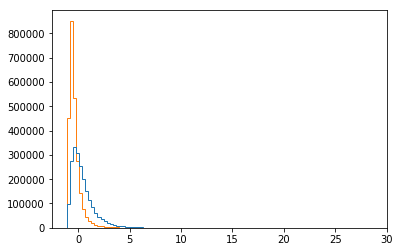

In [10]:
_ = plt.hist(
    [nuisance_train[labels_train > 0.5], nuisance_train[labels_train < 0.5]],
    bins=100, histtype='step'
)

In [11]:
X_train, X_test, y_train, y_test, z_train, z_test = [
    torch.tensor(x).to(device)
    for x in [data_train, data_test, labels_train, labels_test, nuisance_train, nuisance_test]
]

In [12]:
dataset_test = torch.utils.data.TensorDataset(X_test, y_test, z_test)
loader_test =  torch.utils.data.DataLoader(dataset_test, batch_size=1024, shuffle=False)

def get_test_predictions(model):
    with torch.no_grad():
        return np.concatenate([
            torch.sigmoid(model(X_batch)).to('cpu').detach().numpy()
            for X_batch, _, _ in loader_test
        ], axis=0)

In [13]:
class Classifier(torch.nn.Module):
    ### define classifier here
    ### don't forget about torch.squeeze
    def __init__(self, ):
        super(Classifier, self).__init__()

In [14]:
clf = Classifier().to(device)

### define loss here
loss_fn_clf = None

In [15]:
n_epoches = 64
n_batches = 4096

losses = np.zeros((n_epoches, n_batches), dtype='float32')

opt_clf = torch.optim.Adam(clf.parameters(), lr=1e-3)

for i in range(n_epoches):
    for j in range(n_batches):
        ### define training procedure here
        indx = torch.randint(0, data_train.shape[0], size=(32, ))
        X_batch, y_batch, z_batch = X_train[indx], y_train[indx], z_train[indx]
        
        losses[i, j] = 0.0

ValueError: optimizer got an empty parameter list

In [ ]:
plot_losses(classifier=losses_clf)

## Let's pivot

In [ ]:
class Adversary(torch.nn.Module):
    ### define adversary here
    ### don't forget about torch.squeeze
    def __init__(self, ):
        super(Adversary, self).__init__()

In [ ]:
pclf = Classifier().to(device)

### define pivoted classifier loss here
loss_fn_pclf = None

adv = Adversary().to(device)

### define adversary loss here
loss_fn_adv = None

In [ ]:
n_epoches = 64
n_batches = 1024

losses_clf = np.zeros((n_epoches, n_batches), dtype='float32')
losses_adv = np.zeros((n_epoches, n_batches), dtype='float32')

opt_pclf = torch.optim.Adam(pclf.parameters(), lr=1e-3)
opt_adv = torch.optim.Adamax(adv.parameters(), lr=5e-3)

for i in range(n_epoches):
    for j in range(n_batches):
        for k in range(16):
            indx = torch.randint(0, data_train.shape[0], size=(32, ))
            X_batch, y_batch, z_batch = X_train[indx], y_train[indx], z_train[indx]
            
            ### define adversary training here
    
        indx = torch.randint(0, data_train.shape[0], size=(32, ))
        X_batch, y_batch, z_batch = X_train[indx], y_train[indx], z_train[indx]
        
        ### define pivoted classifier training here
        
        losses_clf[i, j] = 0.0
        losses_adv[i, j] = 0.0

In [ ]:
plot_losses(classifier=losses_clf, adversary=losses_adv)

## Results

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
nuisance_metric_plot([
        get_test_predictions(clf),
        get_test_predictions(pclf),
    ],
    labels=labels_test,
    nuisance=nuisance_test,
    metric_fn=roc_auc_score,
    names=['non-pivoted', 'pivoted']
)